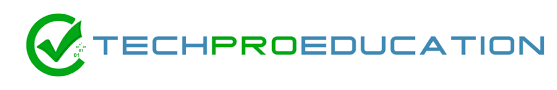

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





In [154]:
# Free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. 
# Thus, it is aimed to reduce traffic congestion, noise and air pollution.
# London (2015,2016 and 2017!(two months))

# **Table of Contents**


1. [General Info on Dataset](#1)
1. [Read Data](#2)
1. [Check Missing Values](#3)
1. [Clean-up the dataset for integer values which refers specific values. Integer --> Wording](#4)
1. [Feature Engineering - segregate day, month and year from timestamp](#5)
1. [Usage by day, season, weather, holiday, hours and weekend](#6)
1. [Conclusion](#7)

---
# **Read Data** <a class="anchor" id="1"></a>

<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [65]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [66]:
df = pd.read_csv("store_sharing.csv", encoding = "windows-1252")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


---
# **Check Missing Values** <a class="anchor" id="3"></a>

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [68]:
# Check null values
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [69]:
#Bring only if gretaer than 0.
df.isna().sum()[df.isna().sum() > 0] 

Series([], dtype: int64)

In [70]:
#Check if there is any duplicated row?
duplicates = df.duplicated().any() 
duplicates

False

In [71]:
#Check if there is any N/A value?
df.isna().sum() 

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

---
# **Clean-up the dataset for integer values whihc refers specific values. Integer --> Wording** <a class="anchor" id="4"></a>

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [73]:
# Clean-up some integer indicators. (1.0,2.0,...)
# Wind_Speed, Weather_Code, Is_Holiday, "Is_Weekend", "Season" columns need cleaning.

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [75]:
# Implement necessary adjustments for those columns as per instructed below info box.

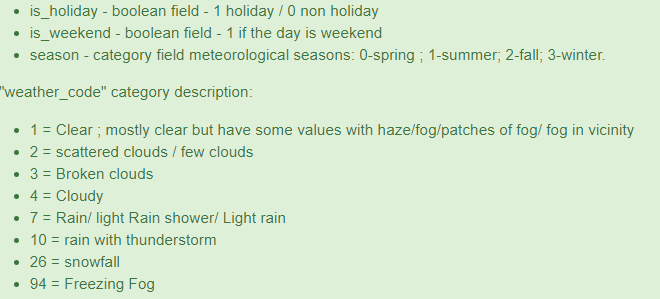

In [77]:
#Season
df['season'].replace(1.0, 'Summer', inplace=True)
df['season'].replace(2.0, 'Fall', inplace=True)
df['season'].replace(3.0, 'Winter', inplace=True)
df['season'].replace(0.0, 'Spring', inplace=True)

#-----------------------------------------------

#Is Holiday
df['is_holiday'].replace(1.0, 'Holiday', inplace=True)
df['is_holiday'].replace(0.0, 'Non-holiday', inplace=True)

#-----------------------------------------------

#Is_Weekend
df['is_weekend'].replace(1.0, 'Weekend', inplace=True)
df['is_weekend'].replace(0.0, 'Non-weekend', inplace=True)

#-----------------------------------------------

#Weather_Code
df['weather_code'].replace(1.0, 'Clear', inplace=True)
df['weather_code'].replace(2.0, 'scattered clouds', inplace=True)
df['weather_code'].replace(3.0, 'Broken clouds', inplace=True)
df['weather_code'].replace(4.0, 'Cloudy', inplace=True)
df['weather_code'].replace(7.0, 'Rain', inplace=True)
df['weather_code'].replace(10.0, 'rain with thunderstorm', inplace=True)
df['weather_code'].replace(26.0, 'snowfall', inplace=True)
df['weather_code'].replace(94.0, 'Freezing Fog', inplace=True)

In [78]:
#Check if our changes are implemented in the dataset
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter


---
# **Feature Engineering - segregate day, month and year from timestamp** <a class="anchor" id="5"></a>

In [79]:
# Check daily usage

In [80]:
#Get only date and ct columns and assign it into new variable
new_df = pd.DataFrame({'date': df['timestamp'], 'ct': df['cnt']})
new_df

,date,ct
0,2015-01-04 00:00:00,182
1,2015-01-04 01:00:00,138
2,2015-01-04 02:00:00,134
3,2015-01-04 03:00:00,72
4,2015-01-04 04:00:00,47
...,...,...
17409,2017-01-03 19:00:00,1042
17410,2017-01-03 20:00:00,541
17411,2017-01-03 21:00:00,337
17412,2017-01-03 22:00:00,224


In [81]:
#Get only datetime and exclude the timestamp
new_df['date'] = pd.to_datetime(new_df['date'])

# Extract day information and assign it to the "date" column instead of timestamp
new_df['date'] = new_df['date'].dt.day_name()

In [82]:
new_df

,date,ct
0,Sunday,182
1,Sunday,138
2,Sunday,134
3,Sunday,72
4,Sunday,47
...,...,...
17409,Tuesday,1042
17410,Tuesday,541
17411,Tuesday,337
17412,Tuesday,224


In [84]:
#Check sum of bike-sharing/renting records per day!
new_df_days = new_df.groupby('date')['ct'].sum()
new_df_days

date
Friday       2897793
Monday       2834719
Saturday     2454040
Sunday       2403716
Thursday     3136956
Tuesday      3081414
Wednesday    3097334
Name: ct, dtype: int64

---
# **Usage by day, season, wheather, holiday** <a class="anchor" id="6"></a>

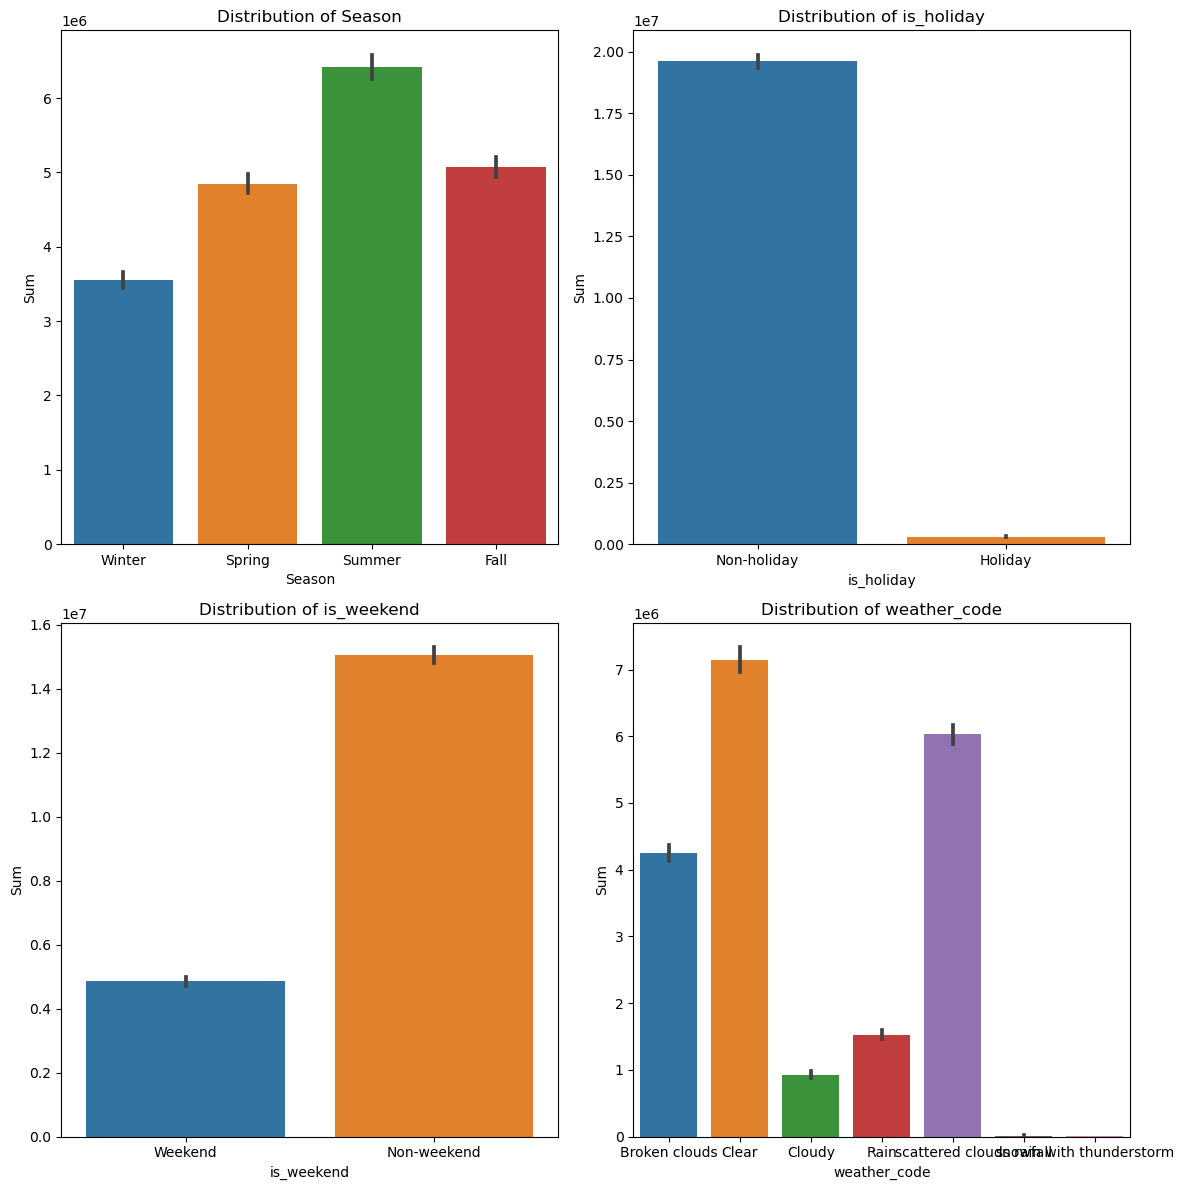

In [110]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# First plot by season
sns.barplot(data=df, x="season", y='cnt', estimator=sum, ax=ax[0][0])
ax[0][0].set_xlabel("Season")
ax[0][0].set_ylabel('Sum')
ax[0][0].set_title('Distribution of Season')

# Second plot by holiday
sns.barplot(data=df, x="is_holiday", y='cnt', estimator=sum, ax=ax[0][1])
ax[0][1].set_xlabel("is_holiday")
ax[0][1].set_ylabel('Sum')
ax[0][1].set_title('Distribution of is_holiday')

# Third plot by weekend
sns.barplot(data=df, x="is_weekend", y='cnt', estimator=sum, ax=ax[1][0])
ax[1][0].set_xlabel("is_weekend")
ax[1][0].set_ylabel('Sum')
ax[1][0].set_title('Distribution of is_weekend')

# Fourth plot by weather code
sns.barplot(data=df, x="weather_code", y='cnt', estimator=sum, ax=ax[1][1])
ax[1][1].set_xlabel("weather_code")
ax[1][1].set_ylabel('Sum')
ax[1][1].set_title('Distribution of weather_code')

fig.tight_layout()
plt.show()


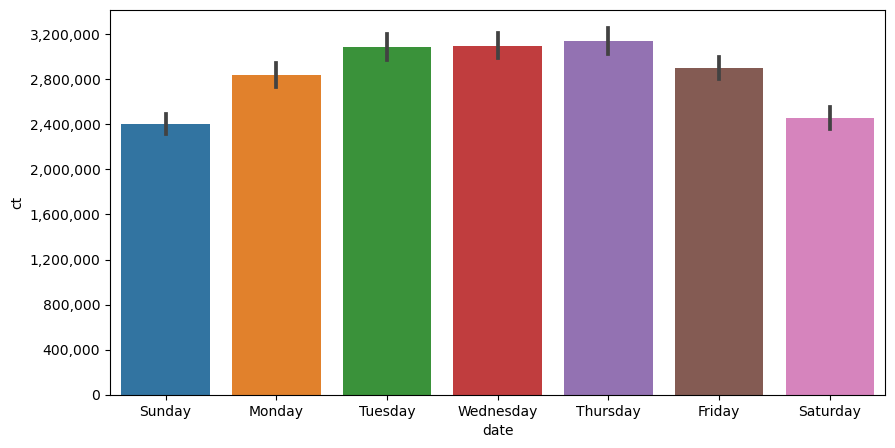

In [88]:
# Check the daily usage.
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=new_df, x="date", y="ct", estimator=sum)

# Format y-axis tick labels as integers
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

# According to this result we see that there is a lower interest to this system on the weekedn due to the fact that this
# system is being used especially during commute to avoid traffic jam. (We will see the details later)

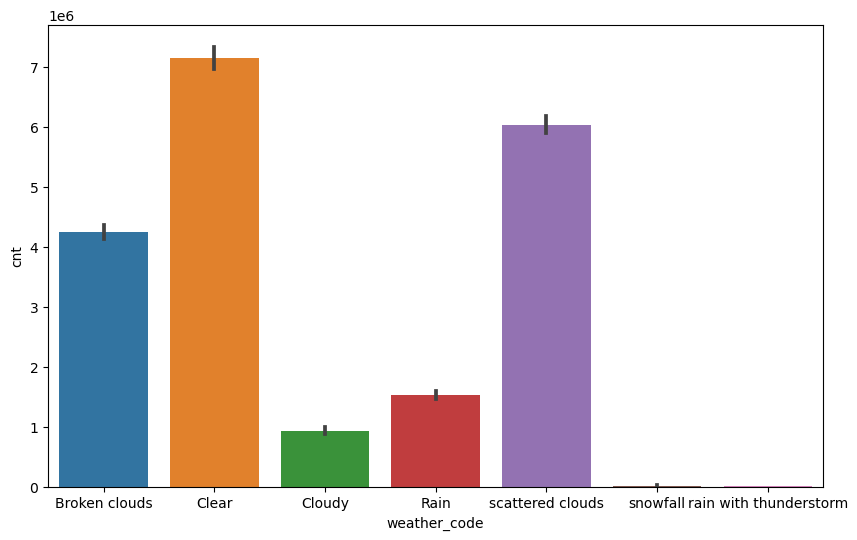

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="weather_code", y="cnt", estimator=sum)
plt.show();

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  object 
 7   is_holiday    17414 non-null  object 
 8   is_weekend    17414 non-null  object 
 9   season        17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [93]:
df = df.set_index('timestamp')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  object 
 6   is_holiday    17414 non-null  object 
 7   is_weekend    17414 non-null  object 
 8   season        17414 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ MB


In [95]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

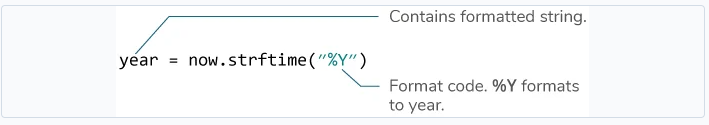

In [111]:
# DO NOT RUN THIS CODE!!!

# Create new columns for date, day, month and year

# Exclude the hours / timestamp
#df.index = pd.to_datetime(df.index)

# set it as index
#df1.set_index("timestamp", inplace = True)

# transform timestamp in type
#df.timestamp = pd.to_datetime(df.timestamp)

#df.index.year
#df['year'] = df.index.strftime("%Y") # df["year"] = df.index.year

In [102]:
# Create new columns for date, day, month and year

#Create other columns
df['day_of_week'] = df.index.day_name() #Day
df['day_of_month'] = df.index.day # Date
df['hour'] = df.index.hour
df['month'] = df.index.month #Month Number 0...12
df['year'] = df.index.year

In [103]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,day_of_month,hour,month,year
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,Sunday,4,0,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,Sunday,4,1,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter,Sunday,4,2,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter,Sunday,4,3,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter,Sunday,4,4,1,2015


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

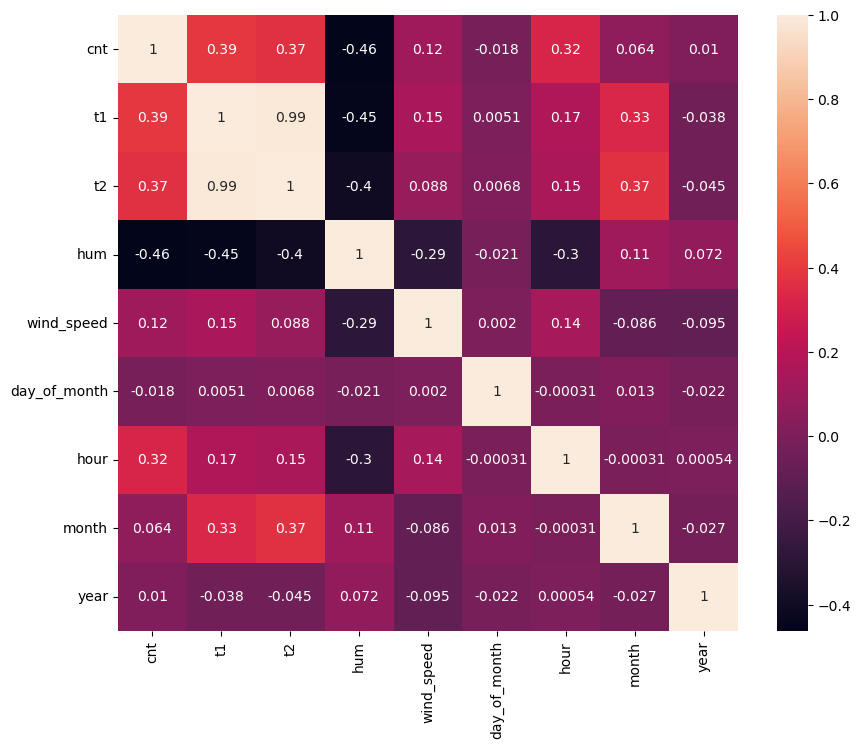

In [114]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [116]:
# --> There is a very high (0.99) correlation between the announced air temperature (t1) and the sensed air temperature (t2) and it would be appropriate to include only one of them in the ML analyses.
# -->There is a positive and relatively strong (0.39) relationship between air temperature and the number of bicycles rented.
# -->There is a negative and relatively strong (0.45) relationship between air temperature (t1) and humidity.
# -->There is a negative and relatively strong (0.29) relationship between wind speed and humidity.

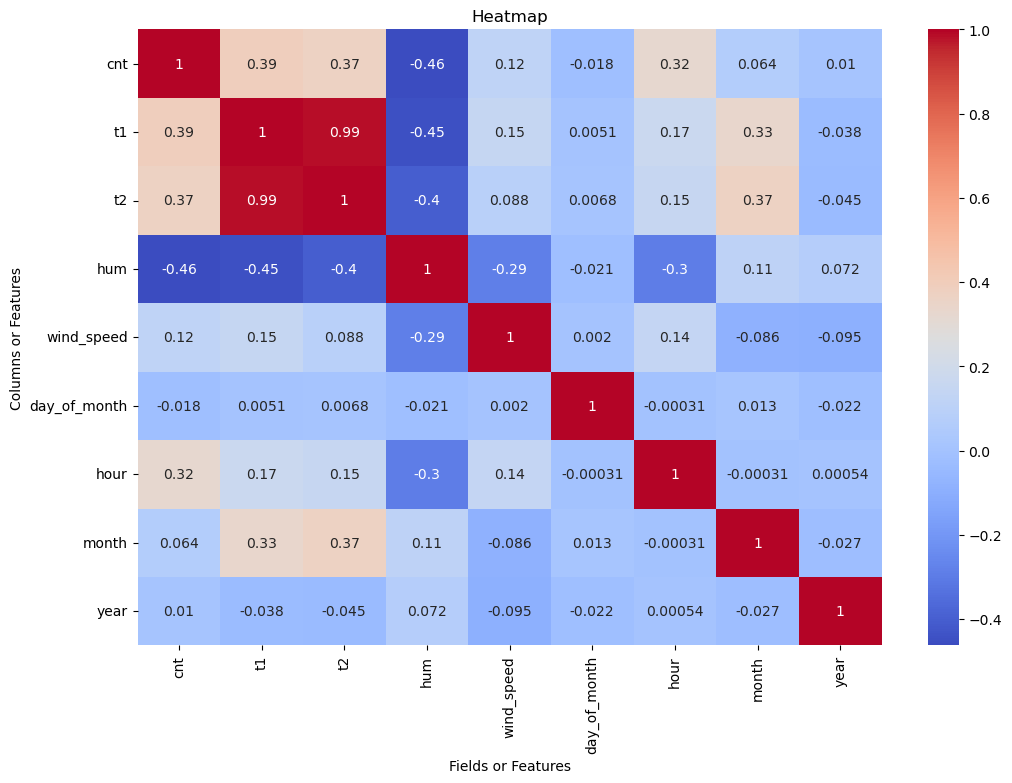

In [115]:
# DS-6 Code
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, ax=ax,cmap = "coolwarm")

ax.set_title("Heatmap")
ax.set_xlabel("Fields or Features")
ax.set_ylabel("Columns or Features")

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

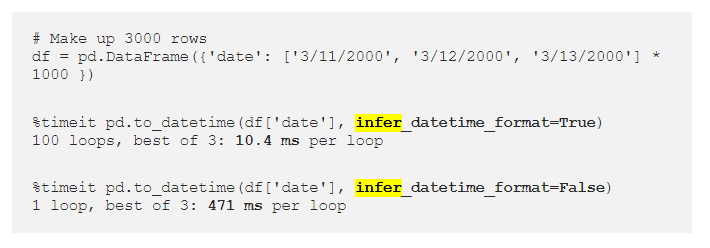

In [151]:
# first correlate
# second target correlate
# target correlate with other features
# visualize

In [144]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,day_of_month,hour,month,year
timestamp,,,,,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,Sunday,4,0,1,2015


In [145]:
df.corr()
# Correlation, in simple terms, refers to a statistical measure that helps us understand the relationship between two variables. 
# It tells us how closely related or connected those variables are.

,cnt,t1,t2,hum,wind_speed,day_of_month,hour,month,year
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.017887,0.324423,0.063757,0.010046
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,0.005072,0.168708,0.332712,-0.037959
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,0.006791,0.153956,0.368366,-0.044972
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,-0.020868,-0.295653,0.113149,0.072443
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.002040,0.141792,-0.086383,-0.094739
day_of_month,-0.017887,0.005072,0.006791,-0.020868,0.002040,1.000000,-0.000310,0.012614,-0.021935
hour,0.324423,0.168708,0.153956,-0.295653,0.141792,-0.000310,1.000000,-0.000312,0.000542
month,0.063757,0.332712,0.368366,0.113149,-0.086383,0.012614,-0.000312,1.000000,-0.026547
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.021935,0.000542,-0.026547,1.000000


In [146]:
df.corr().cnt

cnt             1.000000
t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
day_of_month   -0.017887
hour            0.324423
month           0.063757
year            0.010046
Name: cnt, dtype: float64

In [147]:
target_corr = df.corr().cnt.drop('cnt')
target_corr

t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
day_of_month   -0.017887
hour            0.324423
month           0.063757
year            0.010046
Name: cnt, dtype: float64

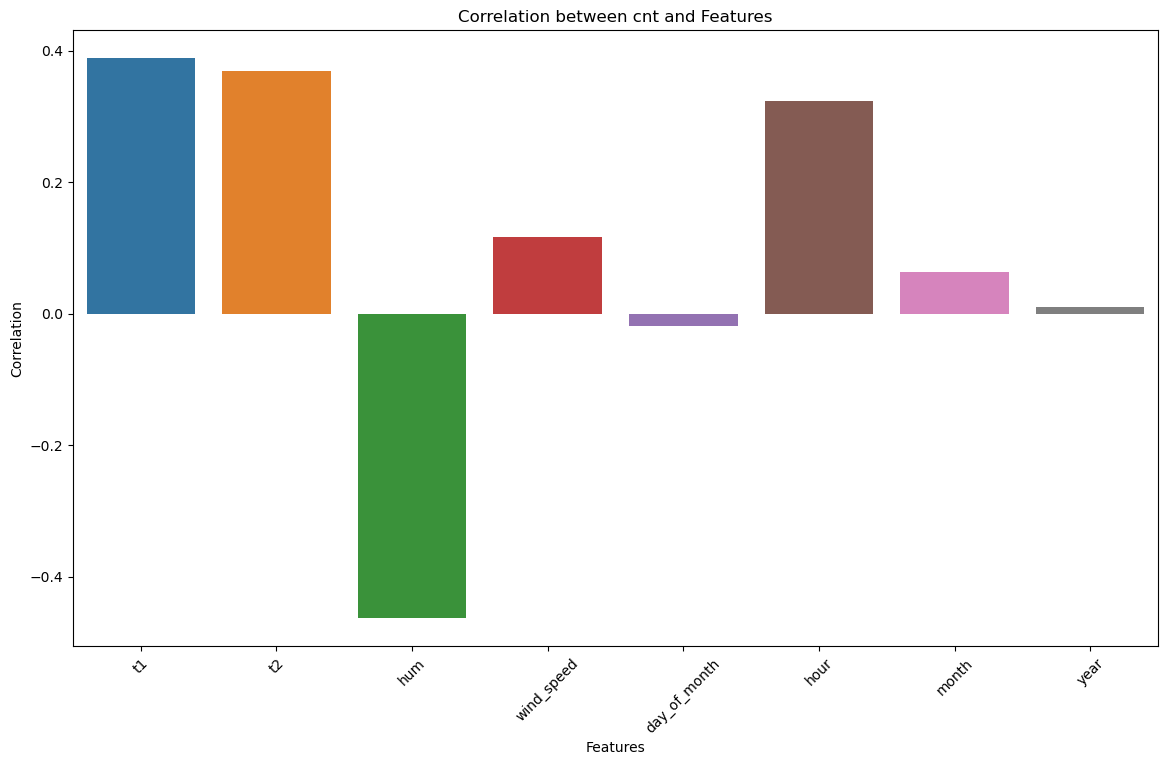

In [148]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45) # in OOM we use ax.tick_params(axis = "x", rotation = 45) instead
plt.show()

In [149]:
target_corr = target_corr.sort_values(ascending=False)

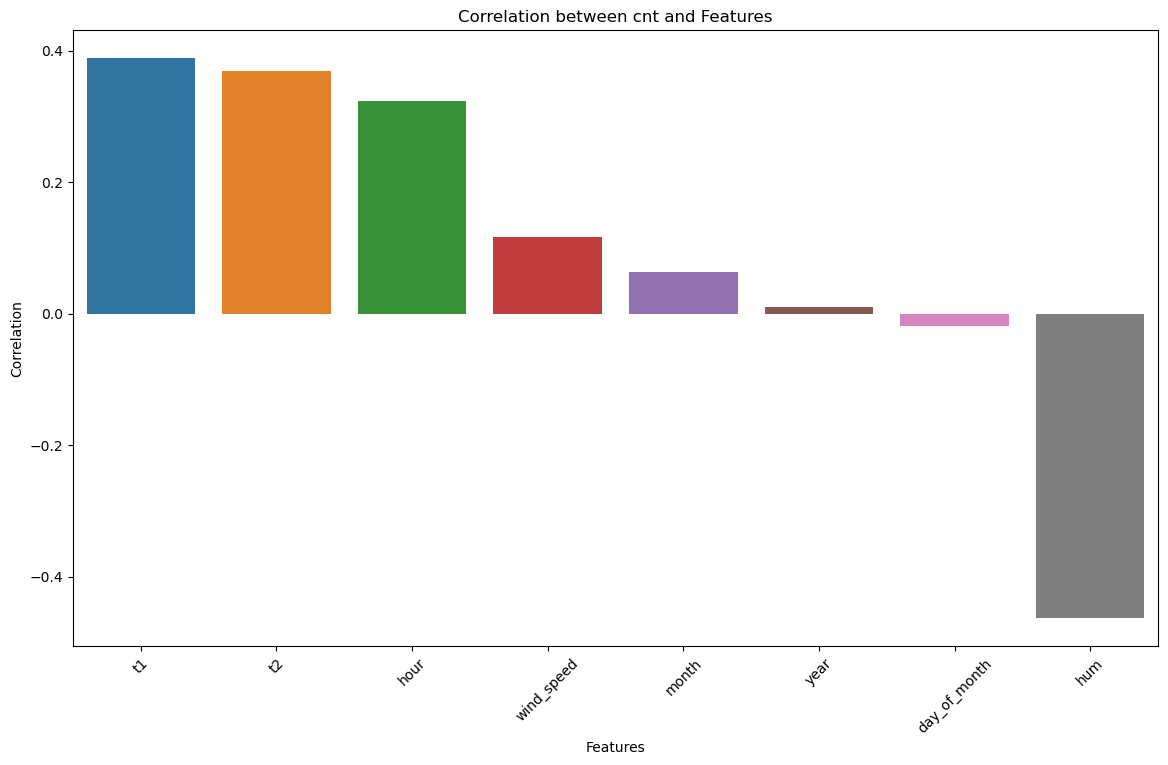

In [150]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45) # in OOM we use ax.tick_params(axis = "x", rotation = 45) instead
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

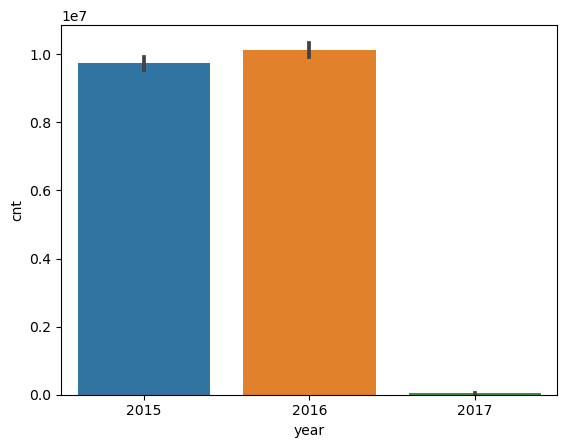

In [117]:
sns.barplot(data=df, x="year", y="cnt", estimator=sum);

In [118]:
df['year']

timestamp
2015-01-04 00:00:00    2015
2015-01-04 01:00:00    2015
2015-01-04 02:00:00    2015
2015-01-04 03:00:00    2015
2015-01-04 04:00:00    2015
                       ... 
2017-01-03 19:00:00    2017
2017-01-03 20:00:00    2017
2017-01-03 21:00:00    2017
2017-01-03 22:00:00    2017
2017-01-03 23:00:00    2017
Name: year, Length: 17414, dtype: int64

In [119]:
count_2017 = df[df['year'] == 2017].shape[0]
count_2017

72

In [120]:
count_other_years = df[df['year'].isin([2015, 2016])].shape[0]
count_other_years


17342

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

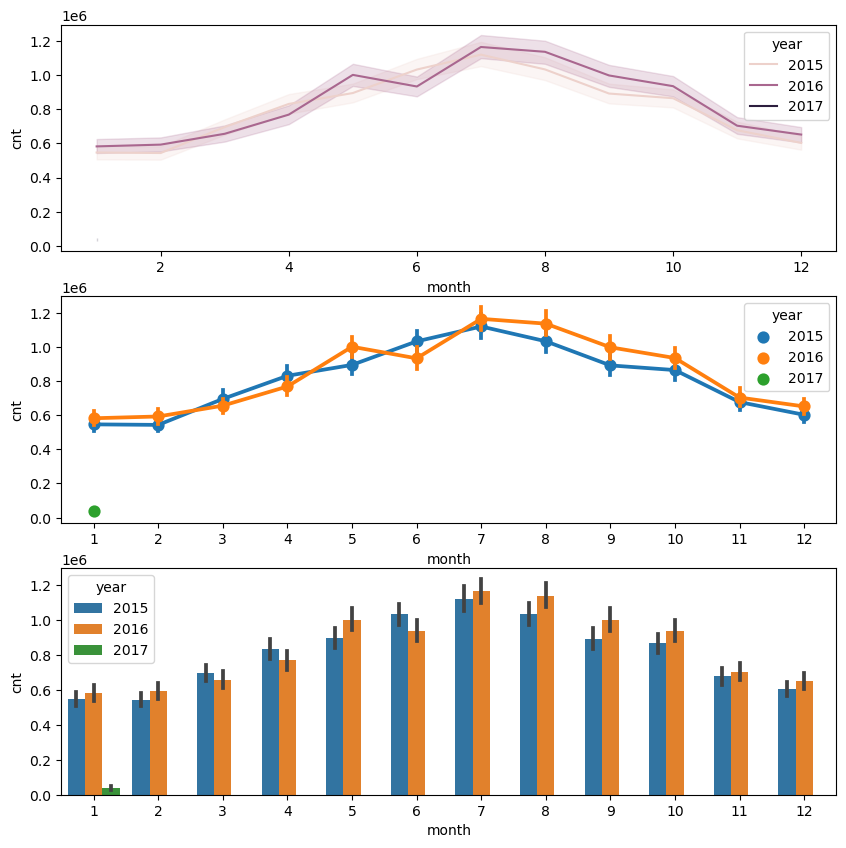

In [121]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

sns.lineplot(data=df, x="month", y="cnt", hue="year", estimator=sum, ax=ax[0])
sns.pointplot(data=df, x="month", y="cnt", hue="year", estimator=sum, ax=ax[1])
sns.barplot(data=df, x="month", y="cnt", hue="year", estimator=sum, ax=ax[2])

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

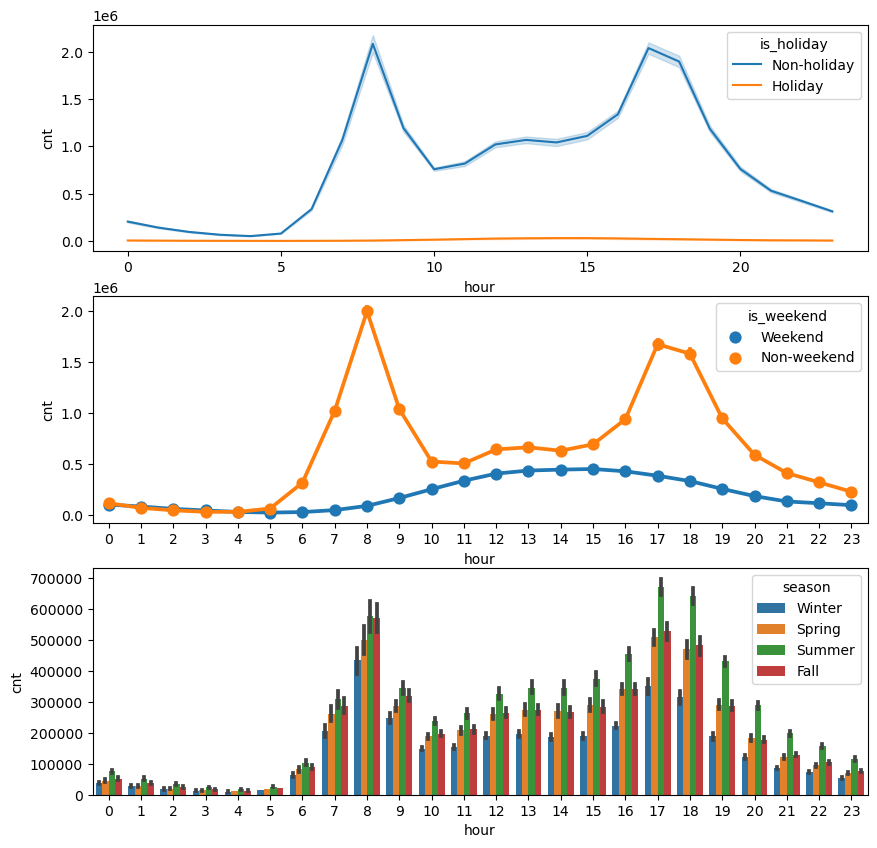

In [123]:
fig, ax = plt.subplots(3,1, figsize=(10,10))

sns.lineplot(data=df, x = "hour", y="cnt",hue="is_holiday",estimator=sum, ax =ax[0])
sns.pointplot(data=df, x = "hour", y="cnt",hue="is_weekend",estimator=sum, ax =ax[1])
sns.barplot(data=df, x = "hour",y="cnt" ,hue="season",estimator=sum, ax =ax[2])

plt.show();

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

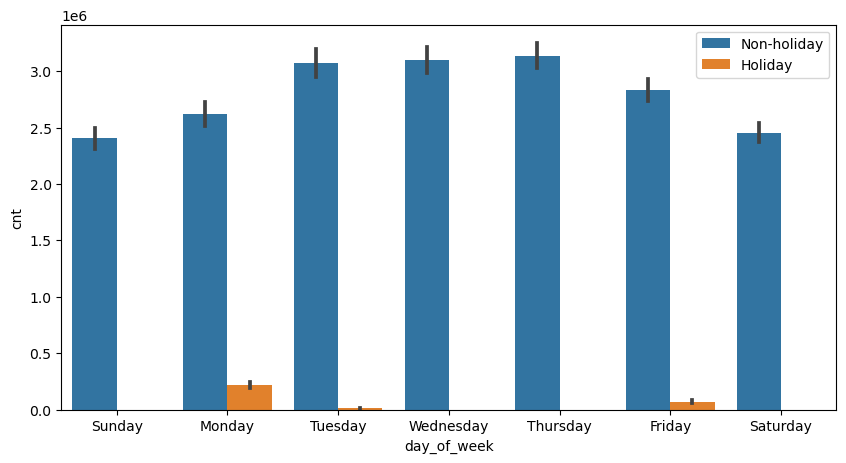

In [127]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create the bar plot
sns.barplot(data=df, x="day_of_week", y="cnt", hue="is_holiday", estimator=sum)

# Move the legend to the top-right position
plt.legend(loc='upper right', bbox_to_anchor=(1.00, 1))

# Display the plot
plt.show()

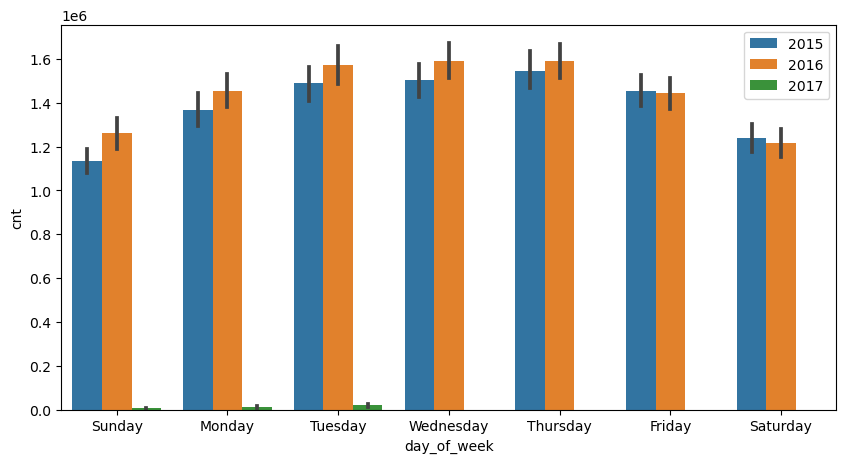

In [128]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create the bar plot
sns.barplot(data=df, x="day_of_week", y="cnt", hue="year", estimator=sum)

# Move the legend to the top-right position
plt.legend(loc='upper right', bbox_to_anchor=(1.00, 1))

# Display the plot
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

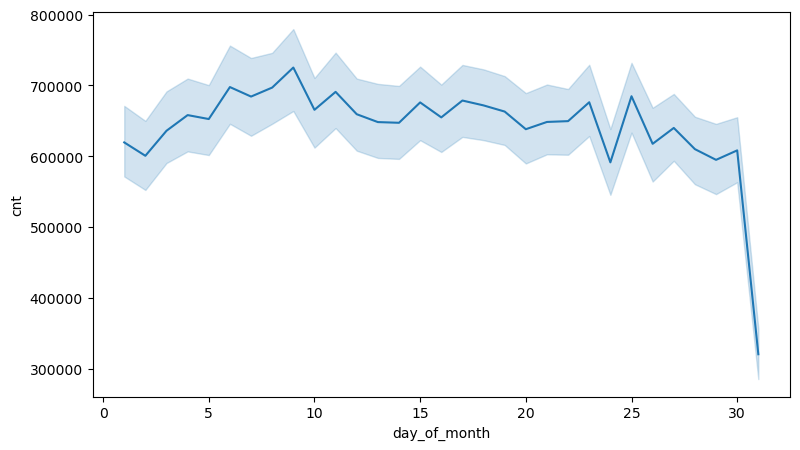

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.lineplot(data=df, x="day_of_month", y="cnt", estimator=sum, ax=ax)

plt.show();

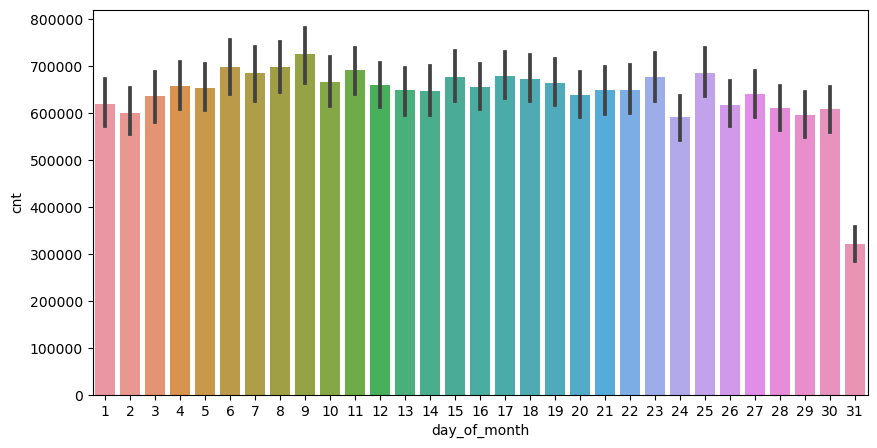

In [131]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create the bar plot
sns.barplot(data=df, x="day_of_month", y="cnt", estimator=sum)

# Display the plot
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

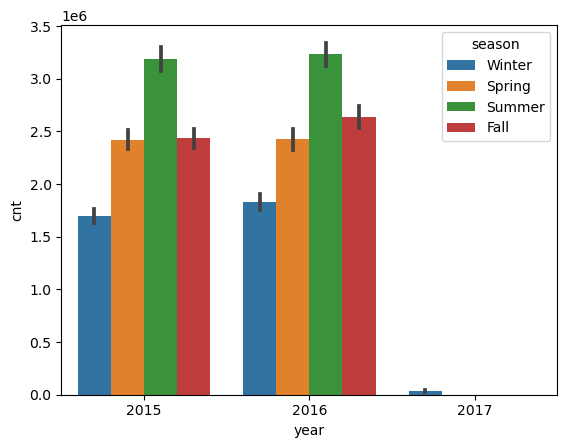

In [132]:
sns.barplot(data=df, x="year", y="cnt", hue="season", estimator=sum);

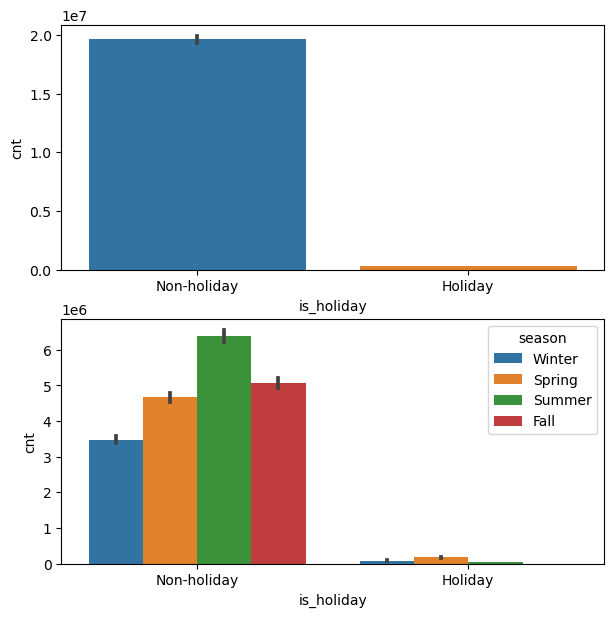

In [137]:
fig, ax = plt.subplots(2,1, figsize=(7,7))

sns.barplot(data=df, x = "is_holiday", y="cnt",estimator=sum, ax =ax[0])
sns.barplot(data=df, x="is_holiday", y="cnt", hue="season", estimator=sum, ax =ax[1])

plt.show();

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [138]:
df_pie = df.groupby(['is_weekend'])["cnt"].sum().reset_index()
df_pie

,is_weekend,cnt
0,Non-weekend,15048216
1,Weekend,4857756


In [139]:
#df_pie.value_counts().index

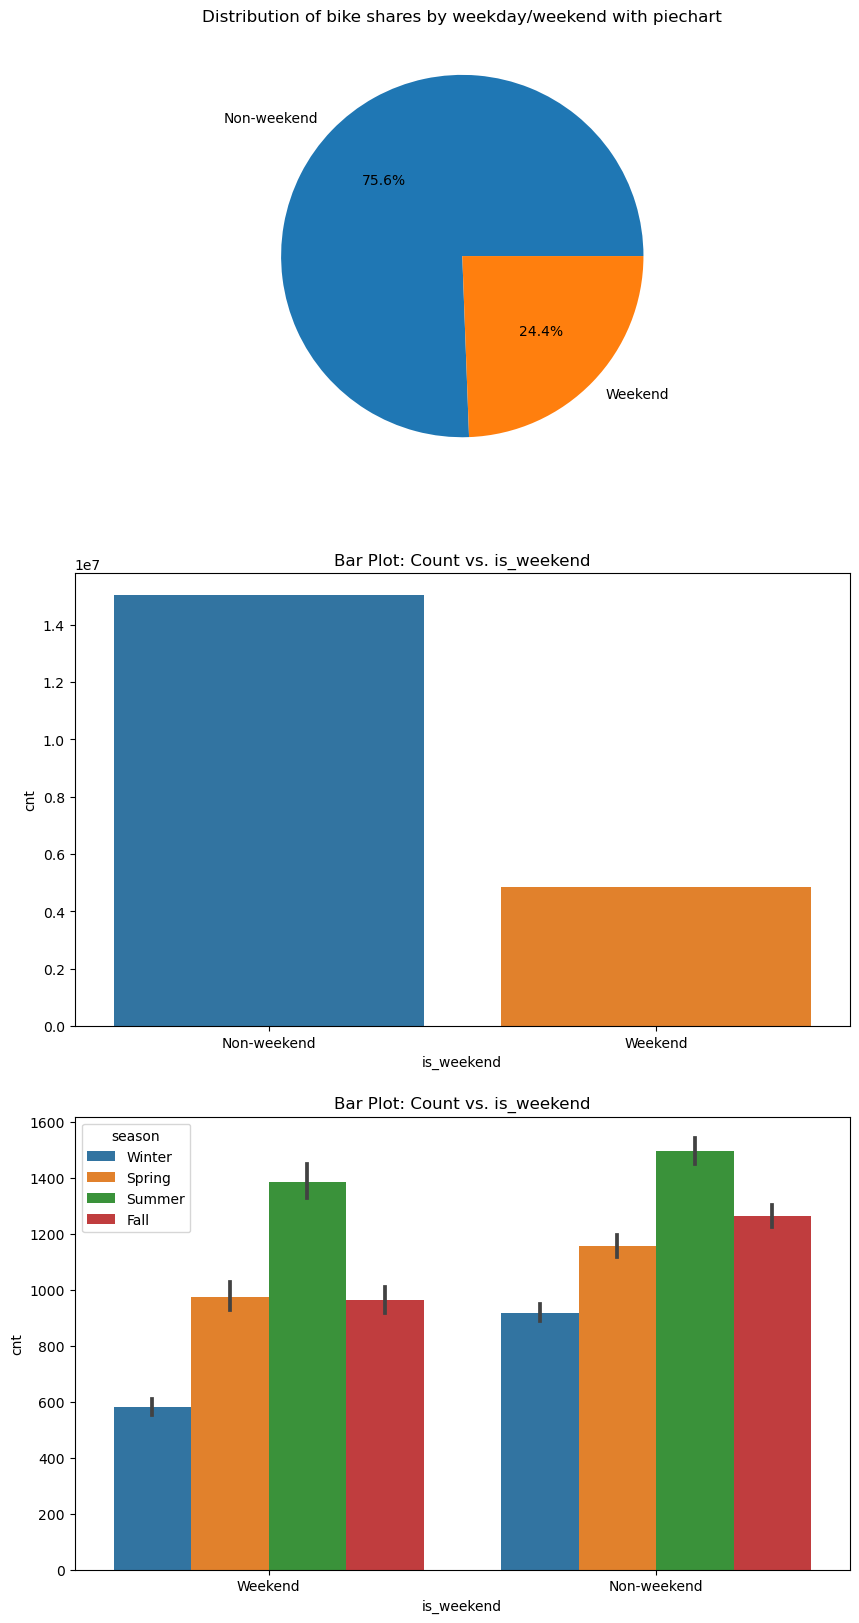

In [142]:

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 20))

# Pie chart
ax[0].pie(x=df_pie.cnt, labels=df_pie.is_weekend, autopct='%1.1f%%')
ax[0].set_title('Distribution of bike shares by weekday/weekend with piechart')

sns.barplot(data=df_pie, x="is_weekend", y="cnt", ax=ax[1])
ax[1].set_title('Bar Plot: Count vs. is_weekend')

# Bar plot
sns.barplot(data=df, x="is_weekend", y="cnt", hue="season", ax=ax[2])
ax[2].set_title('Bar Plot: Count vs. is_weekend')

# Display the plots
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

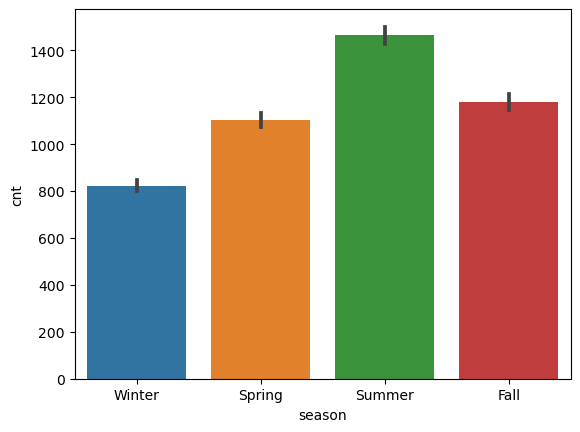

In [143]:
sns.barplot(data=df, x="season", y="cnt");
plt.show();


    
# **Usage by day, season, wheather, holiday** <a class="anchor" id="7"></a> 


This study analyses the demand for bicycle hire by people living in London, the capital city of England, in the period 2015-2017. For 2017, only January data is available. According to the results obtained from the analyses;

In the light of these information we may confirm that this system succeeded and is an alternative solution for public transportation vehicles during commute time.

Especially usage is higher during commute time than other time periods.

1- We explicitly see that demand is higher on weekdays and on non-holiday days than weekend and holidays.

2- People rent bicycles most often on days when the weather is "clear". In second place are the days with "scatter clouds" and in third place are the days with "broken clouds". Interestingly, more bicycles are rented on "rainy" days than on "cloudy" days. On snowy and stormy days, bicycle hire is around zero.

3- People tend to hire bicycles less on weekends and holidays.

4- Similarly bicycle rental is slightly lower in winter and autumn then spring and summer.

5- People's demand for bicycle hire is lower on Fridays.

6- According to correlation analysis; there is a very high (0.99) correlation between the announced air temperature (t1) and the sensed air temperature (t2) and it would be appropriate to include only one of them in the ML analyses.Lkely there is a positive and relatively strong (0.39) relationship between air temperature and the number of bicycles rented.Again there is a negative and relatively strong (0.45) relationship between air temperature (t1) and humidity. Lastly there is a negative and relatively strong (0.29) relationship between wind speed and humidity. In general; There is a positive correlation between bike sharing and temperature and a negative correlation between bike sharing and humidity.

7- As the air temperature increases, the number of bicycle rentals also increases, and when the air temperature exceeds 33 degrees Celsius, the number of bicycle rentals increases very quickly. Then when temperature exceeds 33 the number of bicycle rentals increases sharply.

8- There is a concave parabolic relationship between wind speed and bicycle hire. While people prefer to rent bicycles in light windy weather, they give up renting bicycles when the wind speed exceeds 26 km/h.

9- Demand for bicycle hire increases rapidly from March onwards, peaks in July and then starts to decline. The decline in demand accelerates after October, reaching its lowest levels between December and March.
To sum up; bicycle rental is higher on weekdays during non-holiday periods. It is higher at summers. Bicycle hire companies should make their preparations accordingly.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

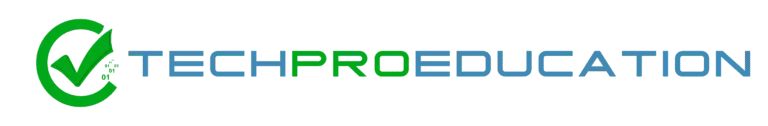